### Setup  Environment

In [1]:
!pip3 install openpyxl


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load and Preprocess the Data

In [31]:
file_path = "/Users/Internship/Documents/gradient_descent/house_price_2016.xlsx"
df = pd.read_excel(file_path,sheet_name='2016')
print(df.head())

           id       Date  number of bedrooms  number of bathrooms  \
0  6762810145 2016-05-01                   5                 2.50   
1  6762810635 2016-05-01                   4                 2.50   
2  6762810998 2016-05-01                   5                 2.75   
3  6762812605 2016-05-01                   4                 2.50   
4  6762812919 2016-05-01                   3                 2.00   

   living area  lot area  number of floors  waterfront present  \
0         3650      9050               2.0                   0   
1         2920      4000               1.5                   0   
2         2910      9480               1.5                   0   
3         3310     42998               2.0                   0   
4         2710      4500               1.5                   0   

   number of views  condition of the house  ...  Built Year  Renovation Year  \
0                4                       5  ...        1921                0   
1                0          

In [32]:
df = df.drop(['id', 'Date'], axis=1, errors='ignore')  # drop the columns that are not numeric because we cannot scall non numeric feature

# Extract the features and target variable
X = df.drop('Price', axis=1).values  # Drop the 'Price' column (target)
y = df['Price'].values              # Extract the target column

X

array([[5.000e+00, 2.500e+00, 3.650e+03, ..., 5.400e+03, 2.000e+00,
        5.800e+01],
       [4.000e+00, 2.500e+00, 2.920e+03, ..., 4.000e+03, 2.000e+00,
        5.100e+01],
       [5.000e+00, 2.750e+00, 2.910e+03, ..., 6.600e+03, 1.000e+00,
        5.300e+01],
       ...,
       [2.000e+00, 1.000e+00, 1.070e+03, ..., 6.120e+03, 2.000e+00,
        6.400e+01],
       [4.000e+00, 1.000e+00, 1.030e+03, ..., 6.631e+03, 3.000e+00,
        5.400e+01],
       [3.000e+00, 1.000e+00, 9.000e+02, ..., 3.480e+03, 2.000e+00,
        5.500e+01]])

In [33]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (14620, 20)
Shape of y: (14620,)


In [34]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features (X)
X = scaler.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Scale y and flatten back to 1D
# Add a column of ones for the bias term (intercept)
X = np.c_[np.ones(X.shape[0]), X]  # Add bias as the first column

# Check the transformed features
print("Transformed Features with Bias Term:")
print(X[:5])  # Display first 5 rows to verify


Transformed Features with Bias Term:
[[ 1.00000000e+00  1.72651488e+00  4.81118728e-01  1.67169090e+00
  -1.59376270e-01  9.21180431e-01 -8.78628402e-02  4.91612603e+00
   2.36323827e+00  1.97241984e+00  1.88084789e+00 -3.67396759e-02
  -1.69284412e+00 -2.18461024e-01 -1.57544351e+00  5.21042852e-01
  -1.08259320e+00  1.27816008e+00 -2.82202571e-01 -1.49812303e-02
  -7.77885993e-01]
 [ 1.00000000e+00  6.61196758e-01  4.81118728e-01  8.85259724e-01
  -2.92557261e-01 -4.36818430e-03 -8.78628402e-02 -3.04222791e-01
   2.36323827e+00  2.70281419e-01  1.29789496e-01  1.59077715e+00
  -2.09972562e+00 -2.18461024e-01 -1.52303746e+00  6.90476044e-01
  -4.66973740e-01  6.84876969e-01 -3.35929857e-01 -1.49812303e-02
  -1.56126035e+00]
 [ 1.00000000e+00  1.72651488e+00  8.05832781e-01  8.74486694e-01
  -1.48036107e-01 -4.36818430e-03 -8.78628402e-02 -3.04222791e-01
  -6.48227216e-01  2.70281419e-01  1.32914456e+00 -6.60992706e-01
  -1.08252187e+00 -2.18461024e-01 -1.52303746e+00  6.71569336e-01
 

#### hyperparameter

In [ ]:
alpha = 0.001
epochs = 10000

theta = np.zeros(X.shape[1])

theta

array([ 0.36167376, -0.69920671,  0.95837195,  0.77301454,  0.53801402,
       -0.7576887 ,  1.51075949,  1.1125494 ,  0.1616935 ,  1.75380768,
       -0.28929611, -1.18539205, -0.96411125, -0.64687207, -0.31899   ,
        0.01154631,  0.41728254, -1.31401632,  0.29118418, -2.24295004,
        1.05838862])

##### MSE (Mean Squared Error) It measures how far the predicted values are from the true values.

In [36]:
def gradient_descent(X, y, theta, alpha, epochs):
  m = len(y)
  errors = []
  for _ in range(epochs):

    # Calculate the predictions
    predictions = X.dot(theta) #predictions is y_pred the predicted values from the current weights theta.

    # Calculate MSE
    error = (1/m) * np.sum((predictions - y) ** 2)
    errors.append(error)

    # Calculate the grdient of the cost function, by getting a vectorized implementation of the gradient
    gradient = (2/m) * X.T.dot(X.dot(theta) - y)
    # we adjust the values of theta so that the cost becomes smaller.
    theta = theta - alpha * gradient

  return theta, errors

theta, errors = gradient_descent(X, y, theta, alpha, epochs)

theta

array([-5.79480038e-15, -8.63321555e-02,  8.58826139e-02,  1.01917021e+00,
        2.84336251e-04,  2.04723548e-03,  1.37620617e-01,  1.02290599e-01,
        5.88617230e-02,  3.13786328e-01, -4.86501455e-01, -3.09389644e-01,
       -1.96833520e-01,  2.71990588e-02,  1.44200934e-02,  2.07016423e-01,
       -3.83759516e-02,  3.07354941e-02, -2.64083231e-02,  3.89088678e-03,
       -2.99444146e-03])

#### Vectorized Gradient Calculation:

##### The gradient of the cost function is computed for all parameters (theta) at once using matrix operations:
##### This automatically handles the partial derivatives for all theta values, whether you have 1 feature, 2 features, or more.

In [ ]:
predictions = X.dot(theta)

# print the first 5 predictions along with the actual values and differences
predictions[:5], y[:5], predictions[:5] - y[:5]

print("Actual vs Predicted")
print(np.c_[y[:5], predictions[:5]])

Actual vs Predicted
[[5.00943820e+00 1.43786621e+06]
 [2.34291528e+00 9.40468712e+05]
 [1.79872693e+00 8.18843248e+05]
 [8.13746015e-01 8.81983579e+05]
 [7.23954937e-01 8.42233423e+05]]


In [40]:
# Print some of the metrics for measuring the model performance
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y, predictions)))
print("R2 Score:", r2_score(y, predictions))

MSE: 385361005794.8461
RMSE: 620774.5208969567
R2 Score: -385361005793.8461


40157225190.56655

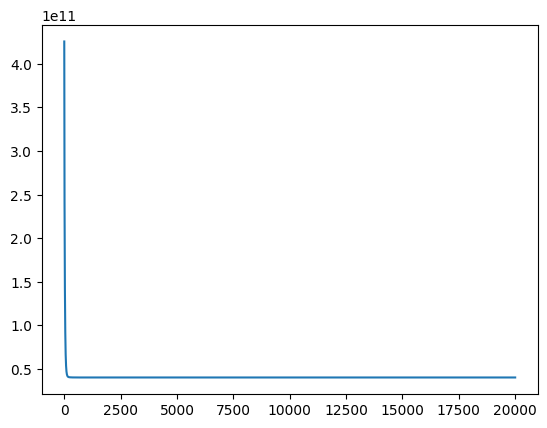

In [28]:
from matplotlib import pyplot as plt
plt.plot(errors)
errors[-1]